In [1]:
# download data
import os
import shutil
import sys
from urllib.request import urlopen

def download_if_not_exists(url, filename):
  if os.path.isfile(filename):
    print("{} already exists".format(filename))
    return
  os.makedirs(os.path.dirname(filename), exist_ok=True)
  obj = urlopen(url)
  with open(filename, "wb") as f:
    %time shutil.copyfileobj(obj, f)

os.makedirs("tmp", exist_ok=True)

In [2]:
# 人口、世帯数、面積を取得
import pandas as pd
url = "https://www.e-stat.go.jp/stat-search/file-download?statInfId=000032143614&fileKind=0"
with urlopen(url) as u, open("tmp/census.xlsx", "wb") as f:
  shutil.copyfileobj(u, f)
p = pd.read_excel("tmp/census.xlsx")
p

第２面事項_2020年


,令和２年国勢調査（総務省統計局） 都道府県・市区町村別の主な結果,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,注）※マークの項目については、「参考表：令和２年国勢調査に関する不詳補完結果」の結果数値を掲...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,地域,NaN,NaN,NaN,総人口（男女別）,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,47_沖縄県,47361_久米島町,Kumejima-cho,3,7192,3823,3369,7755,-563,-7.25983,...,3332,1664,660,662,83,259,1400,546,365,93
1969,47_沖縄県,47362_八重瀬町,Yaese-cho,3,30941,15244,15697,29066,1875,6.45084,...,10641,7338,1889,4039,244,1166,2320,974,1040,526
1970,47_沖縄県,47375_多良間村,Tarama-son,3,1058,575,483,1194,-136,-11.39028,...,466,260,108,102,10,40,175,72,71,12
1971,47_沖縄県,47381_竹富町,Taketomi-cho,3,3942,2033,1909,3998,-56,-1.4007,...,2089,833,346,369,23,95,1150,279,153,35


In [3]:
p2 = p.iloc[8:, [0, 1, 3, 4, 36, 10]]
p2.columns = ["pref", "city", "type", "population", "household", "area"]
p2["pref_code"] = p2["pref"].str.split("_").apply(lambda a: a[0])
p2["pref_name"] = p2["pref"].str.split("_").apply(lambda a: a[1])
p2["city_code"] = p2["city"].str.split("_").apply(lambda a: a[0])
p2["city_name"] = p2["city"].str.split("_").apply(lambda a: a[1])
# 福島県双葉町が人口、世帯ともにゼロで "-" と入っている
p2.population = p2.population.replace("-", 0).astype(int)
p2.household = p2.household.replace("-", 0).astype(int)
p2.area = p2.area.astype(float)
print(p2.dtypes)
p2

pref           object
city           object
type           object
population      int64
household       int64
area          float64
pref_code      object
pref_name      object
city_code      object
city_name      object
dtype: object


,pref,city,type,population,household,area,pref_code,pref_name,city_code,city_name
8,00_全国,00000_全国,a,126146099,55704949,377976.41,00,全国,00000,全国
9,01_北海道,01000_北海道,a,5224614,2469063,83424.44,01,北海道,01000,北海道
10,01_北海道,01100_札幌市,1,1973395,967372,1121.26,01,北海道,01100,札幌市
11,01_北海道,01101_札幌市中央区,0,248680,141223,46.42,01,北海道,01101,札幌市中央区
12,01_北海道,01102_札幌市北区,0,289323,139449,63.57,01,北海道,01102,札幌市北区
...,...,...,...,...,...,...,...,...,...,...
1968,47_沖縄県,47361_久米島町,3,7192,3332,63.65,47,沖縄県,47361,久米島町
1969,47_沖縄県,47362_八重瀬町,3,30941,10641,26.96,47,沖縄県,47362,八重瀬町
1970,47_沖縄県,47375_多良間村,3,1058,466,22.00,47,沖縄県,47375,多良間村
1971,47_沖縄県,47381_竹富町,3,3942,2089,334.40,47,沖縄県,47381,竹富町


In [4]:
p2[p2["type"]==0]

,pref,city,type,population,household,area,pref_code,pref_name,city_code,city_name
11,01_北海道,01101_札幌市中央区,0,248680,141223,46.42,01,北海道,01101,札幌市中央区
12,01_北海道,01102_札幌市北区,0,289323,139449,63.57,01,北海道,01102,札幌市北区
13,01_北海道,01103_札幌市東区,0,265379,130904,56.97,01,北海道,01103,札幌市東区
14,01_北海道,01104_札幌市白石区,0,211835,108077,34.47,01,北海道,01104,札幌市白石区
15,01_北海道,01105_札幌市豊平区,0,225298,118472,46.23,01,北海道,01105,札幌市豊平区
...,...,...,...,...,...,...,...,...,...,...
1792,43_熊本県,43101_熊本市中央区,0,187502,99723,25.45,43,熊本県,43101,熊本市中央区
1793,43_熊本県,43102_熊本市東区,0,189524,80268,50.19,43,熊本県,43102,熊本市東区
1794,43_熊本県,43103_熊本市西区,0,91177,39675,89.33,43,熊本県,43103,熊本市西区
1795,43_熊本県,43104_熊本市南区,0,130829,49813,110.01,43,熊本県,43104,熊本市南区


In [5]:
# 都道府県
p3 = p2[p2.type == "a"]
p3 = p3[p3.pref_code != "00"]  # 全国以外
p3 = p3.reset_index(drop=True)
p3 = p3[["pref_code", "pref_name", "population", "household", "area"]]
p3.pref_code = p3.pref_code.astype(int)
print(p3.shape)
display(p3)

# 市区町村
p4 = p2[p2.type.isin([0, 2, 3])].reset_index(drop=True)
p4["city_type"] = p4["type"].apply(lambda a: ["ward", "", "city", "town/village"][a])
p4["area_code"] = p4["city_code"]
p4["city_code"] = p4["city_code"].str.slice(2)
p4 = p4[["area_code", "pref_code", "pref_name", "city_code", "city_name", "city_type", "population", "household", "area"]]
p4.area_code = p4.area_code.astype(int)
display(p4)

(47, 5)


,pref_code,pref_name,population,household,area
0,1,北海道,5224614,2469063,83424.44
1,2,青森県,1237984,509649,9645.64
2,3,岩手県,1210534,490828,15275.01
3,4,宮城県,2301996,980549,7282.29
4,5,秋田県,959502,383531,11637.52
5,6,山形県,1068027,396792,9323.15
6,7,福島県,1833152,740089,13784.14
7,8,茨城県,2867009,1181598,6097.39
8,9,栃木県,1933146,795449,6408.09
9,10,群馬県,1939110,803215,6362.28


,area_code,pref_code,pref_name,city_code,city_name,city_type,population,household,area
0,1101,01,北海道,101,札幌市中央区,ward,248680,141223,46.42
1,1102,01,北海道,102,札幌市北区,ward,289323,139449,63.57
2,1103,01,北海道,103,札幌市東区,ward,265379,130904,56.97
3,1104,01,北海道,104,札幌市白石区,ward,211835,108077,34.47
4,1105,01,北海道,105,札幌市豊平区,ward,225298,118472,46.23
...,...,...,...,...,...,...,...,...,...
1891,47361,47,沖縄県,361,久米島町,town/village,7192,3332,63.65
1892,47362,47,沖縄県,362,八重瀬町,town/village,30941,10641,26.96
1893,47375,47,沖縄県,375,多良間村,town/village,1058,466,22.00
1894,47381,47,沖縄県,381,竹富町,town/village,3942,2089,334.40


In [6]:
# コードの一意性の確認
print(len(p3.pref_code.unique()) == len(p3))
print(len(p4.area_code.unique()) == len(p4))

True
True


In [7]:
# 市区町村レベルまでのポリゴン
url = "https://nlftp.mlit.go.jp/ksj/gml/data/N03/N03-2022/N03-20220101_GML.zip"
%time download_if_not_exists(url, "tmp/cities.zip")

# unzip the downloaded files
from zipfile import ZipFile

def unzip(filename, directory):
  with ZipFile(filename) as z:
    %time z.extractall(path=directory)

filename = "tmp/cities.zip"
target = filename[:-4]
unzip(filename, target)

CPU times: user 3.02 s, sys: 4.37 s, total: 7.38 s
Wall time: 1min 33s
CPU times: user 3.03 s, sys: 4.37 s, total: 7.4 s
Wall time: 1min 33s
CPU times: user 11 s, sys: 1.43 s, total: 12.4 s
Wall time: 12.7 s


In [8]:
# geopandas で読込み
import pandas as pd
import geopandas as gpd
from glob import glob

shapefile = ("tmp/cities/N03-22_220101.shp")

x = gpd.read_file(shapefile)
x

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,北海道,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.79936 41.35187, 139.79940 ..."
1,青森県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.93600 40.42836, 139.93587 ..."
2,岩手県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.71763 38.93417, 141.71762 ..."
3,宮城県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.50558 38.24465, 141.50556 ..."
4,秋田県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.87835 39.12636, 139.87785 ..."
...,...,...,...,...,...,...
123001,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((122.99033 24.47245, 122.99031 24.472..."
123002,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00771 24.47383, 123.00773 24.473..."
123003,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00657 24.47437, 123.00658 24.474..."
123004,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((122.99828 24.47500, 123.00000 24.473..."


In [9]:
y = x.copy()

# 列名を小文字にする
y.columns = ["pref_name", "shicho", "gun", "city_name", "area_code", "geometry"]

y

,pref_name,shicho,gun,city_name,area_code,geometry
0,北海道,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.79936 41.35187, 139.79940 ..."
1,青森県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.93600 40.42836, 139.93587 ..."
2,岩手県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.71763 38.93417, 141.71762 ..."
3,宮城県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((141.50558 38.24465, 141.50556 ..."
4,秋田県,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((139.87835 39.12636, 139.87785 ..."
...,...,...,...,...,...,...
123001,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((122.99033 24.47245, 122.99031 24.472..."
123002,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00771 24.47383, 123.00773 24.473..."
123003,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00657 24.47437, 123.00658 24.474..."
123004,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((122.99828 24.47500, 123.00000 24.473..."


In [10]:
z2 = y[["area_code", "pref_name"]].copy().dropna()
z2["pref_code"] = z2.area_code.str.slice(0, 2)
z2 = z2[["pref_code", "pref_name"]].drop_duplicates().reset_index(drop=True)
z2

,pref_code,pref_name
0,01,北海道
1,02,青森県
2,03,岩手県
3,04,宮城県
4,05,秋田県
5,06,山形県
6,07,福島県
7,08,茨城県
8,09,栃木県
9,10,群馬県


In [11]:
# 都道府県に限定
z = y[y.shicho.isna() & y.gun.isna() & y.city_name.isna() & y.area_code.isna()].reset_index(drop=True)
z = z[["pref_name", "geometry"]]

# 都道府県コードを作成
z2 = y[["area_code", "pref_name"]].copy().dropna()
z2["pref_code"] = z2.area_code.str.slice(0, 2)
z2 = z2[["pref_code", "pref_name"]].drop_duplicates().reset_index(drop=True)

z = pd.merge(z, z2)
print(type(z))
z

<class 'geopandas.geodataframe.GeoDataFrame'>


,pref_name,geometry,pref_code
0,北海道,"MULTIPOLYGON (((139.79936 41.35187, 139.79940 ...",01
1,青森県,"MULTIPOLYGON (((139.93600 40.42836, 139.93587 ...",02
2,岩手県,"MULTIPOLYGON (((141.71763 38.93417, 141.71762 ...",03
3,宮城県,"MULTIPOLYGON (((141.50558 38.24465, 141.50556 ...",04
4,秋田県,"MULTIPOLYGON (((139.87835 39.12636, 139.87785 ...",05
5,山形県,"MULTIPOLYGON (((139.54718 38.55309, 139.54719 ...",06
6,福島県,"MULTIPOLYGON (((140.79369 36.86217, 140.79366 ...",07
7,茨城県,"MULTIPOLYGON (((140.84152 35.75027, 140.84133 ...",08
8,栃木県,"POLYGON ((139.95784 37.15419, 139.95797 37.154...",09
9,群馬県,"POLYGON ((139.10834 37.05541, 139.10849 37.055...",10


In [12]:
# 人口、世帯数、面積を追加
z.pref_code = z.pref_code.astype(int)
z3 = pd.merge(z, p3)
z3

,pref_name,geometry,pref_code,population,household,area
0,北海道,"MULTIPOLYGON (((139.79936 41.35187, 139.79940 ...",1,5224614,2469063,83424.44
1,青森県,"MULTIPOLYGON (((139.93600 40.42836, 139.93587 ...",2,1237984,509649,9645.64
2,岩手県,"MULTIPOLYGON (((141.71763 38.93417, 141.71762 ...",3,1210534,490828,15275.01
3,宮城県,"MULTIPOLYGON (((141.50558 38.24465, 141.50556 ...",4,2301996,980549,7282.29
4,秋田県,"MULTIPOLYGON (((139.87835 39.12636, 139.87785 ...",5,959502,383531,11637.52
5,山形県,"MULTIPOLYGON (((139.54718 38.55309, 139.54719 ...",6,1068027,396792,9323.15
6,福島県,"MULTIPOLYGON (((140.79369 36.86217, 140.79366 ...",7,1833152,740089,13784.14
7,茨城県,"MULTIPOLYGON (((140.84152 35.75027, 140.84133 ...",8,2867009,1181598,6097.39
8,栃木県,"POLYGON ((139.95784 37.15419, 139.95797 37.154...",9,1933146,795449,6408.09
9,群馬県,"POLYGON ((139.10834 37.05541, 139.10849 37.055...",10,1939110,803215,6362.28


,pref_name,area,area2
0,北海道,83424.44,84219.263618
1,青森県,9645.64,9695.780985
2,岩手県,15275.01,15374.269028
3,宮城県,7282.29,7321.375344
4,秋田県,11637.52,11689.900154
5,山形県,9323.15,9366.728840
6,福島県,13784.14,13845.034158
7,茨城県,6097.39,6126.991638
8,栃木県,6408.09,6432.314475
9,群馬県,6362.28,6377.235472


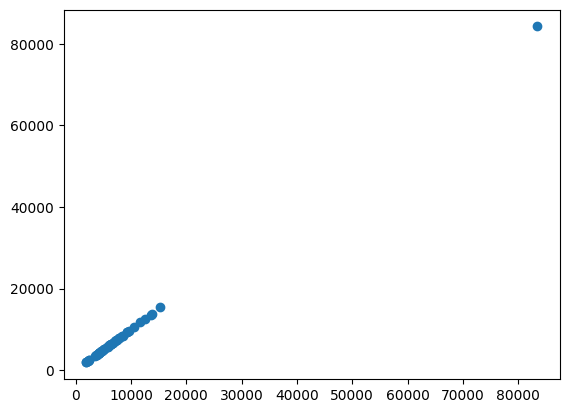

In [13]:
# 面積を比較する
tmp = z3.copy()
tmp.crs = "epsg:4326"
tmp = tmp.to_crs(epsg=3099)
tmp["area2"] = tmp.area / 1000000
import matplotlib.pyplot as plt
plt.scatter(tmp["area"], tmp["area2"])
tmp[["pref_name", "area", "area2"]]

In [14]:
(tmp["area"] / tmp["area2"] - 1).abs().max()
# 最大で誤差率2％ほど

0.017226067135680756

In [15]:
type(z3)

geopandas.geodataframe.GeoDataFrame

CPU times: user 1.34 s, sys: 157 ms, total: 1.5 s
Wall time: 1.07 s


<AxesSubplot: >

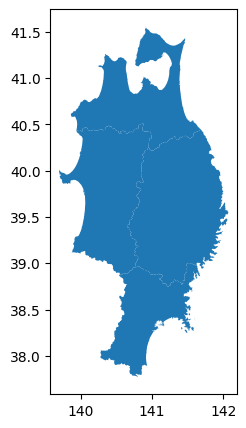

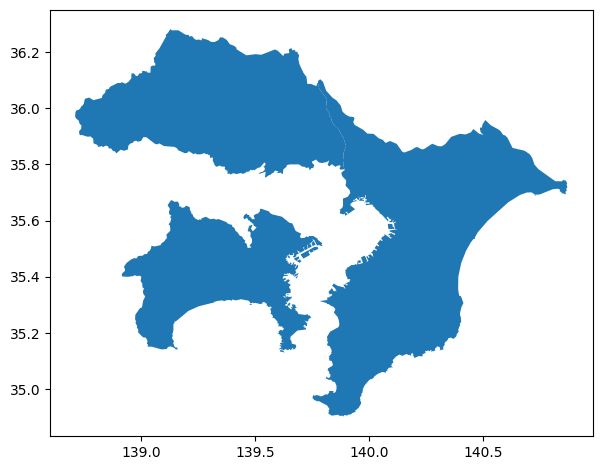

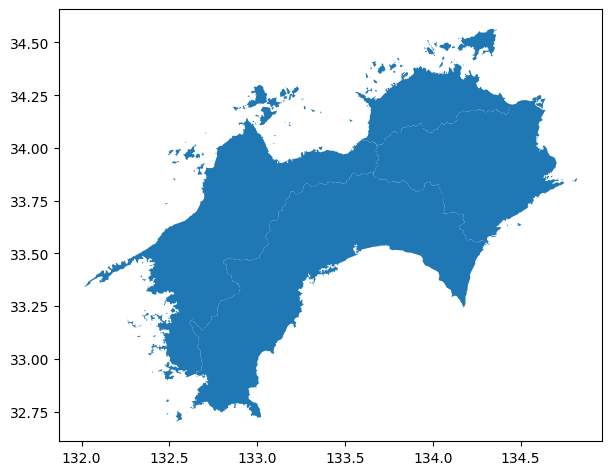

In [16]:
%%time
# このままではサイズが大きいので、geometryを簡素化する
# １度はだいたい 100km くらいなので、
# 誤差 100m に抑えるなら 0.001
tol = 0.002
g = z3.simplify(tol, False)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 5))
g[z3.pref_code.isin([2,3,4,5])].plot(ax=ax)

fig, ax = plt.subplots(figsize=(7, 10))
g[z3.pref_code.isin([11,12,14])].plot(ax=ax)  # 東京は島を含むので見づらいため除く

fig, ax = plt.subplots(figsize=(7, 10))
g[z3.pref_code.isin([36,37,38,39])].plot(ax=ax)

0.018761452115229393

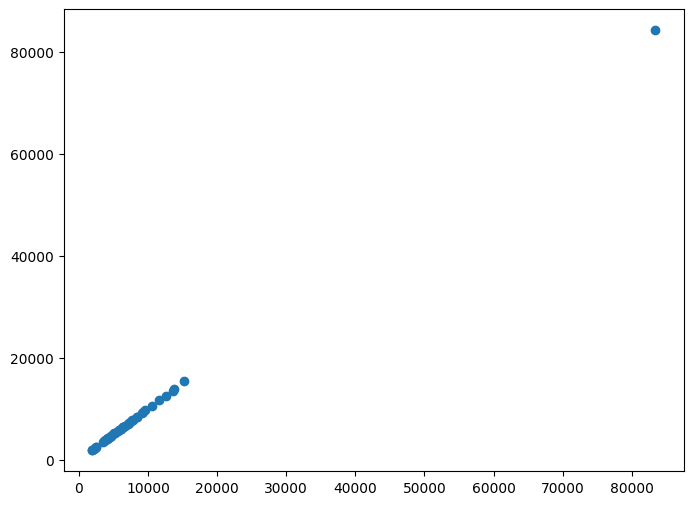

In [17]:
z4 = z3.copy()
z4["geometry"] = z.simplify(tol, False)

# もう一度面積を比較する
tmp = z4.copy()
tmp.crs = "epsg:4326"
tmp = tmp.to_crs(epsg=3099)
tmp["area2"] = tmp.area / 1000000

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(tmp["area"], tmp["area2"])

(tmp["area"] / tmp["area2"] - 1).abs().max()
# 最大で誤差率2％ほど

In [18]:
# 最終調整
# geometry を最後に、面積を除く
cols = ["pref_code", "pref_name", "population", "household", "area", "geometry"]
z5 = z4[cols]

# geometry は WKT に変換
from shapely import wkt
z5["geometry"] = z5.geometry.apply(lambda g: g.wkt)
z5 = pd.DataFrame(z5)
z5

/Users/km255052/venv/sandbox/lib/python3.10/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,pref_code,pref_name,population,household,area,geometry
0,1,北海道,5224614,2469063,83424.44,MULTIPOLYGON (((148.75263496822936 45.55693319...
1,2,青森県,1237984,509649,9645.64,MULTIPOLYGON (((140.21524565869004 40.78059905...
2,3,岩手県,1210534,490828,15275.01,MULTIPOLYGON (((141.68282753566243 40.44949077...
3,4,宮城県,2301996,980549,7282.29,MULTIPOLYGON (((141.03783679065432 38.32366606...
4,5,秋田県,959502,383531,11637.52,MULTIPOLYGON (((139.86372602443672 39.89047944...
5,6,山形県,1068027,396792,9323.15,MULTIPOLYGON (((139.59260356332877 38.63816106...
6,7,福島県,1833152,740089,13784.14,MULTIPOLYGON (((139.71589407107285 37.85010777...
7,8,茨城県,2867009,1181598,6097.39,MULTIPOLYGON (((140.57894570758717 36.30697096...
8,9,栃木県,1933146,795449,6408.09,POLYGON ((139.95783955944833 37.15418936005106...
9,10,群馬県,1939110,803215,6362.28,POLYGON ((139.10834147907624 37.05540550535993...


In [19]:
# コードの一意性の確認
len(z5.pref_code.unique()) == len(z5)

True

In [20]:
# 対象フォルダに保存
import os

dirname = "../data/japan/prefectures"
os.makedirs(dirname, exist_ok=True)
z5.to_csv(f"{dirname}/data.csv.gz", index=False, encoding="utf8", compression="gzip")

# add data.csv to .gitignore
with open(f"{dirname}/.gitignore", "w") as f:
  f.write("data.csv")

In [23]:
w

,pref_name,shicho,gun,city_name,area_code,geometry
0,北海道,石狩振興局,札幌市,中央区,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,北海道,石狩振興局,札幌市,北区,01102,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,北海道,石狩振興局,札幌市,東区,01103,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,北海道,石狩振興局,札幌市,白石区,01104,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,北海道,石狩振興局,札幌市,豊平区,01105,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...,...,...
122800,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.01483 24.47263, 123.01483 24.472..."
122801,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((122.99033 24.47245, 122.99031 24.472..."
122802,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00771 24.47383, 123.00773 24.473..."
122803,沖縄県,NaN,八重山郡,与那国町,47382,"POLYGON ((123.00657 24.47437, 123.00658 24.474..."


In [24]:
w.gun.unique()

array(['札幌市', nan, '石狩郡', '松前郡', '上磯郡', '亀田郡', '茅部郡', '二海郡', '山越郡', '檜山郡',
       '爾志郡', '奥尻郡', '瀬棚郡', '久遠郡', '島牧郡', '寿都郡', '磯谷郡', '虻田郡', '岩内郡',
       '古宇郡', '積丹郡', '古平郡', '余市郡', '空知郡', '夕張郡', '樺戸郡', '雨竜郡', '上川郡',
       '勇払郡', '中川郡', '増毛郡', '留萌郡', '苫前郡', '天塩郡', '宗谷郡', '枝幸郡', '礼文郡',
       '利尻郡', '網走郡', '斜里郡', '常呂郡', '紋別郡', '有珠郡', '白老郡', '沙流郡', '新冠郡',
       '浦河郡', '様似郡', '幌泉郡', '日高郡', '河東郡', '河西郡', '広尾郡', '足寄郡', '十勝郡',
       '釧路郡', '厚岸郡', '川上郡', '阿寒郡', '白糠郡', '野付郡', '標津郡', '目梨郡', '色丹郡',
       '国後郡', '択捉郡', '紗那郡', '蘂取郡', '東津軽郡', '西津軽郡', '中津軽郡', '南津軽郡', '北津軽郡',
       '上北郡', '下北郡', '三戸郡', '岩手郡', '紫波郡', '和賀郡', '胆沢郡', '西磐井郡', '気仙郡',
       '上閉伊郡', '下閉伊郡', '九戸郡', '二戸郡', '仙台市', '刈田郡', '柴田郡', '伊具郡', '亘理郡',
       '宮城郡', '黒川郡', '加美郡', '遠田郡', '牡鹿郡', '本吉郡', '鹿角郡', '北秋田郡', '山本郡',
       '南秋田郡', '仙北郡', '雄勝郡', '東村山郡', '西村山郡', '北村山郡', '最上郡', '東置賜郡',
       '西置賜郡', '東田川郡', '飽海郡', '伊達郡', '安達郡', '岩瀬郡', '南会津郡', '耶麻郡', '河沼郡',
       '大沼郡', '西白河郡', '東白川郡', '石川郡', '田村郡', '双葉郡', '相馬郡', '東茨城郡', '那珂郡',
  

In [29]:
# 市区町村
w = y[~y.city_name.isna() & ~y.area_code.isna()].reset_index(drop=True)
w

# 政令市のみ、city_nameに追加
w.gun = w.gun.fillna("")
w.city_name = w.gun.apply(lambda g: g if g[-1:] == "市" else "") + w.city_name
w = w.drop(columns=["shicho", "gun"])
w

,pref_name,city_name,area_code,geometry
0,北海道,札幌市中央区,01101,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,北海道,札幌市北区,01102,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,北海道,札幌市東区,01103,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,北海道,札幌市白石区,01104,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,北海道,札幌市豊平区,01105,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...
122800,沖縄県,与那国町,47382,"POLYGON ((123.01483 24.47263, 123.01483 24.472..."
122801,沖縄県,与那国町,47382,"POLYGON ((122.99033 24.47245, 122.99031 24.472..."
122802,沖縄県,与那国町,47382,"POLYGON ((123.00771 24.47383, 123.00773 24.473..."
122803,沖縄県,与那国町,47382,"POLYGON ((123.00657 24.47437, 123.00658 24.474..."


In [30]:
%%time
# 市町村レベルで集約
w = w[["area_code", "pref_name", "city_name", "geometry"]].dissolve(by=["area_code", "pref_name", "city_name"], as_index=False)
w

CPU times: user 58 s, sys: 1.22 s, total: 59.3 s
Wall time: 59.4 s


,area_code,pref_name,city_name,geometry
0,01101,北海道,札幌市中央区,"POLYGON ((141.34233 43.06682, 141.34285 43.066..."
1,01102,北海道,札幌市北区,"POLYGON ((141.40839 43.18395, 141.40833 43.183..."
2,01103,北海道,札幌市東区,"POLYGON ((141.44707 43.15616, 141.44694 43.155..."
3,01104,北海道,札幌市白石区,"POLYGON ((141.46244 43.10010, 141.46265 43.100..."
4,01105,北海道,札幌市豊平区,"POLYGON ((141.38463 43.04670, 141.38479 43.046..."
...,...,...,...,...
1897,47361,沖縄県,久米島町,"MULTIPOLYGON (((126.79588 26.29651, 126.79590 ..."
1898,47362,沖縄県,八重瀬町,"MULTIPOLYGON (((127.73365 26.09849, 127.73365 ..."
1899,47375,沖縄県,多良間村,"MULTIPOLYGON (((124.68659 24.63692, 124.68653 ..."
1900,47381,沖縄県,竹富町,"MULTIPOLYGON (((123.55439 24.19211, 123.55435 ..."


In [31]:
# 人口、世帯数、面積を追加

w2 = w[["area_code", "geometry"]].copy()
w2.area_code = w2.area_code.astype(int)
w2 = pd.merge(w2, p4)
w2

,area_code,geometry,pref_code,pref_name,city_code,city_name,city_type,population,household,area
0,1101,"POLYGON ((141.34233 43.06682, 141.34285 43.066...",01,北海道,101,札幌市中央区,ward,248680,141223,46.42
1,1102,"POLYGON ((141.40839 43.18395, 141.40833 43.183...",01,北海道,102,札幌市北区,ward,289323,139449,63.57
2,1103,"POLYGON ((141.44707 43.15616, 141.44694 43.155...",01,北海道,103,札幌市東区,ward,265379,130904,56.97
3,1104,"POLYGON ((141.46244 43.10010, 141.46265 43.100...",01,北海道,104,札幌市白石区,ward,211835,108077,34.47
4,1105,"POLYGON ((141.38463 43.04670, 141.38479 43.046...",01,北海道,105,札幌市豊平区,ward,225298,118472,46.23
...,...,...,...,...,...,...,...,...,...,...
1891,47361,"MULTIPOLYGON (((126.79588 26.29651, 126.79590 ...",47,沖縄県,361,久米島町,town/village,7192,3332,63.65
1892,47362,"MULTIPOLYGON (((127.73365 26.09849, 127.73365 ...",47,沖縄県,362,八重瀬町,town/village,30941,10641,26.96
1893,47375,"MULTIPOLYGON (((124.68659 24.63692, 124.68653 ...",47,沖縄県,375,多良間村,town/village,1058,466,22.00
1894,47381,"MULTIPOLYGON (((123.55439 24.19211, 123.55435 ...",47,沖縄県,381,竹富町,town/village,3942,2089,334.40


<AxesSubplot: >

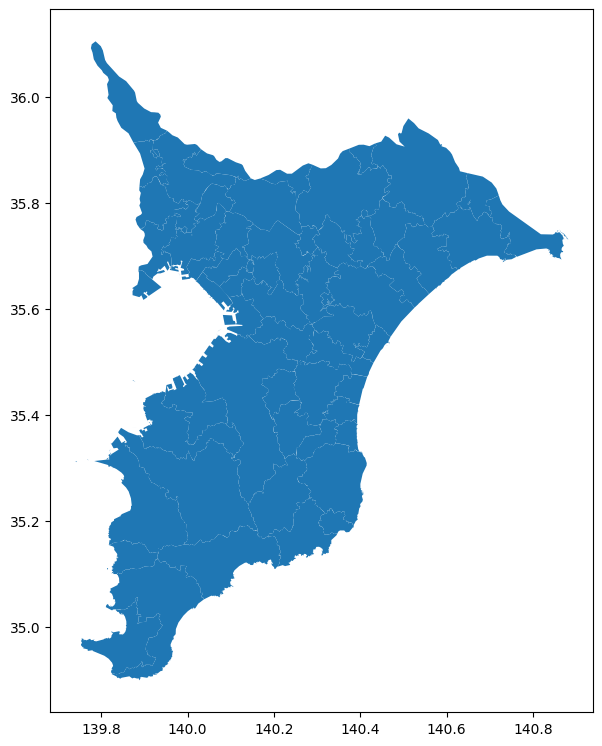

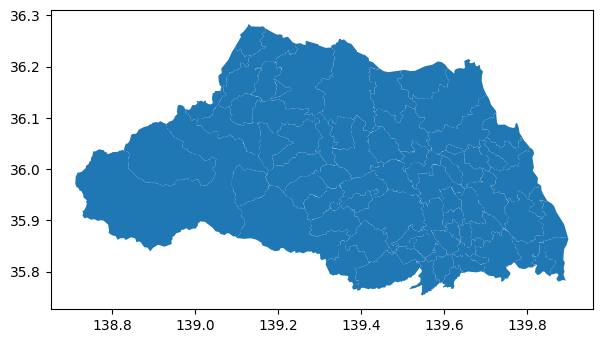

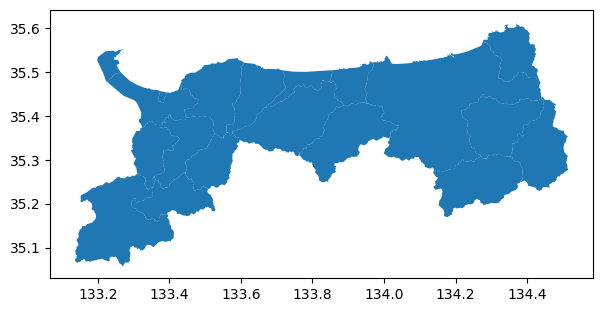

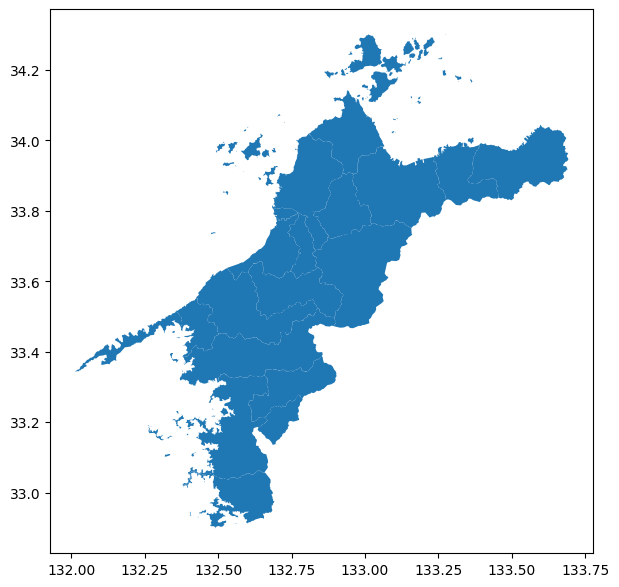

In [32]:
# このままではサイズが大きいので、geometryを簡素化する
# １度はだいたい 100km くらいなので、
# 誤差 100m に抑えるなら 0.001
tol = 0.001
g = w2.simplify(tol, False)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 10))
g[w2.pref_code.isin(["12"])].plot(ax=ax)

fig, ax = plt.subplots(figsize=(7, 10))
g[w2.pref_code.isin(["11"])].plot(ax=ax)

fig, ax = plt.subplots(figsize=(7, 5))
g[w2.pref_code.isin(["31"])].plot(ax=ax)

fig, ax = plt.subplots(figsize=(7, 10))
g[w2.pref_code.isin(["38"])].plot(ax=ax)

In [33]:
w3 = w2.copy()
w3["geometry"] = w2.simplify(tol, False)

# 最終調整
w3.pref_code = w2.pref_code.astype(int)
w3.city_code = w2.city_code.astype(int)
w3 = w3[["area_code", "pref_code", "city_code", "city_type", "pref_name", "city_name", "population", "household", "area", "geometry"]]
# geometry は WKT に変換
from shapely import wkt
w3["geometry"] = w3.geometry.apply(lambda g: g.wkt)
w3 = pd.DataFrame(w3)
w3

/Users/km255052/venv/sandbox/lib/python3.10/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,area_code,pref_code,city_code,city_type,pref_name,city_name,population,household,area,geometry
0,1101,1,101,ward,北海道,札幌市中央区,248680,141223,46.42,"POLYGON ((141.342326939337 43.06681583788077, ..."
1,1102,1,102,ward,北海道,札幌市北区,289323,139449,63.57,POLYGON ((141.4083872238914 43.183947505373226...
2,1103,1,103,ward,北海道,札幌市東区,265379,130904,56.97,POLYGON ((141.44707027207562 43.15616027887393...
3,1104,1,104,ward,北海道,札幌市白石区,211835,108077,34.47,POLYGON ((141.46244138825966 43.10009750479617...
4,1105,1,105,ward,北海道,札幌市豊平区,225298,118472,46.23,POLYGON ((141.38463250258815 43.04669527876427...
...,...,...,...,...,...,...,...,...,...,...
1891,47361,47,361,town/village,沖縄県,久米島町,7192,3332,63.65,MULTIPOLYGON (((128.22301778194526 27.88532777...
1892,47362,47,362,town/village,沖縄県,八重瀬町,30941,10641,26.96,"POLYGON ((127.7154736059224 26.18047416155349,..."
1893,47375,47,375,town/village,沖縄県,多良間村,1058,466,22.00,MULTIPOLYGON (((124.73059088186392 24.64091930...
1894,47381,47,381,town/village,沖縄県,竹富町,3942,2089,334.40,MULTIPOLYGON (((124.08766277581663 24.33990249...


In [34]:
print(w3.dtypes)

area_code       int64
pref_code       int64
city_code       int64
city_type      object
pref_name      object
city_name      object
population      int64
household       int64
area          float64
geometry       object
dtype: object


In [35]:
# コードの一意性の確認
len(w3.area_code.unique()) == len(w3)

True

In [36]:
# 対象フォルダに保存
import os

dirname = "../data/japan/cities"
os.makedirs(dirname, exist_ok=True)
w3.to_csv(f"{dirname}/data.csv.gz", index=False, encoding="utf8", compression="gzip")

# add data.csv to .gitignore
with open(f"{dirname}/.gitignore", "w") as f:
  f.write("data.csv")